In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import QHD.QHD_dataloader as DL
import QHD.QHD_basis as HDB
import QHD.QHD_encoder as HDE
import QHD.QHD_reg as QHDReg

In [2]:
D = 10000
EPOCH = 100
BITS = 3
STD = 0.

In [3]:
with open('current_matrix.json', 'r', encoding='utf8') as f:
  curr_matrices = json.load(f)

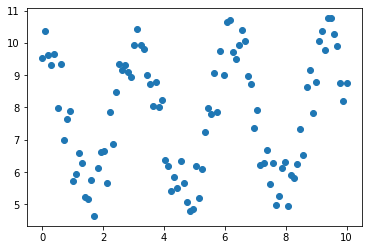

In [4]:
x = np.linspace(0, 10, 100)

func = lambda x: 10*np.cos(np.sin(x))

delta = np.random.uniform(-1, 1, x.size)
y = func(x) + delta


plt.scatter(x, y)
plt.show()

In [5]:
x = x.reshape((-1, 1))

In [6]:
hdb = HDB.HD_basis(D, 1)
basis = hdb.getBasis()
hde = HDE.HD_encoder(basis)
xencoded = hde.encodeData(x)

Generating vanilla HD basis of shape... 

vectors:   0%|          | 0/10000 [00:00<?, ?it/s]

(10000, 1)
Encoding time: 0.14095377922058105 
Encoding data of shape (100, 1)


samples encoded:   0%|          | 0/100 [00:00<?, ?it/s]

Time spent: 0 sec


In [7]:
def plot_mse_by_epoch(history):

  plt.figure(figsize=(10, 7), dpi=80)
  plt.plot(history)
  plt.xlabel('epoch')
  plt.ylabel('MSE')
  plt.show()

def plot_predictions(x, y, pred):

  plt.figure(figsize=(10, 7), dpi=80)
  plt.scatter(x, y, label='datapoints')
  plt.plot(x, pred, color='orange', label='prediction')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

def test_full(dim, num_epoch, x, xencoded, y):
  
  model = QHDReg.QHD_reg(dim, -1)

  history = []

  for epoch in range(num_epoch):
    train_mse = model.itr_train(xencoded, y, lr=0.0001)

    #print(train_mse)
    history.append(train_mse)
  
  plt.hist(model.model)
  plt.show()
  
  plot_mse_by_epoch(history)
  plot_predictions(x, y, [model.predict(x_) for x_ in xencoded])

def test_quant_dotprod(dim, bits, num_epoch, x, xencoded, y, lr=0.0001, quant_norm=False, fix_quant_std=None):
  
  model = QHDReg.QHD_reg(dim, bits, quant_norm=quant_norm, fix_quant_std=fix_quant_std)

  history = []

  for epoch in range(num_epoch):
    train_mse = model.itr_train(xencoded, y, lr=lr)
    model.model_projection()

    #print(train_mse)
    history.append(train_mse)
  
  plt.hist(model.quantized_model)
  plt.show()

  plot_mse_by_epoch(history)
  plot_predictions(x, y, [model.predict(x_) for x_ in xencoded])

def test_quant_current(dim, bits, std, mapping, num_epoch, x, xencoded, y, lr=0.0001):
  
  model = QHDReg.QHD_reg(dim, bits)

  history = []

  for epoch in range(num_epoch):
    train_mse = model.itr_train(xencoded, y, std=std, mapping=mapping, lr=lr)
    model.model_projection()

    #print(train_mse)
    history.append(train_mse)


  plot_mse_by_epoch(history)
  plot_predictions(x, y, [model.predict(x_, std=STD, mapping=mapping) for x_ in xencoded])


## Full precision

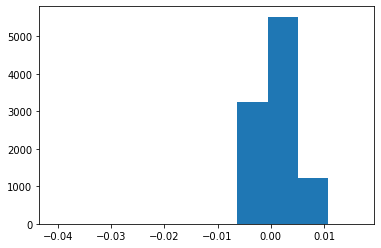

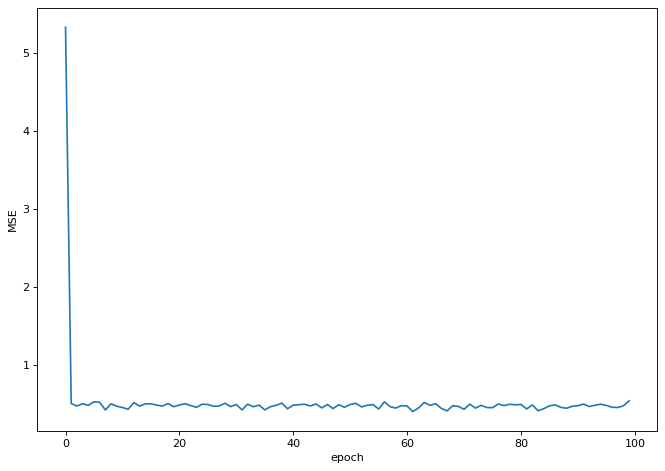

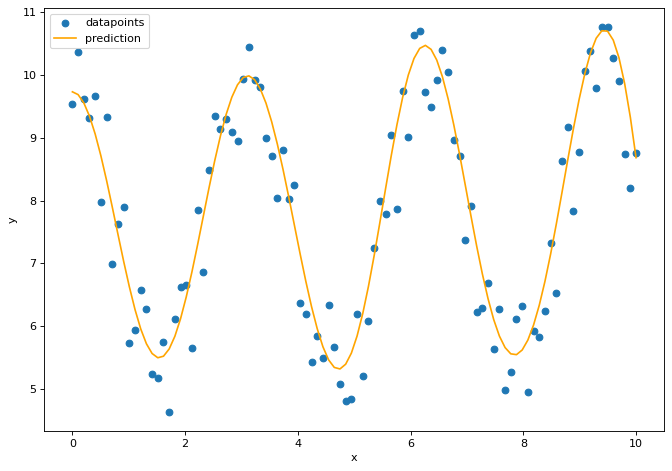

In [8]:
test_full(D, EPOCH, x, xencoded, y)

## QuantHD with dot product

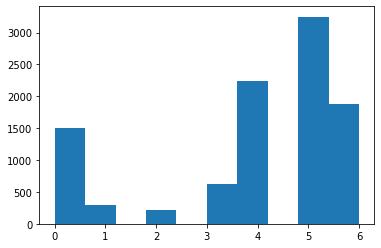

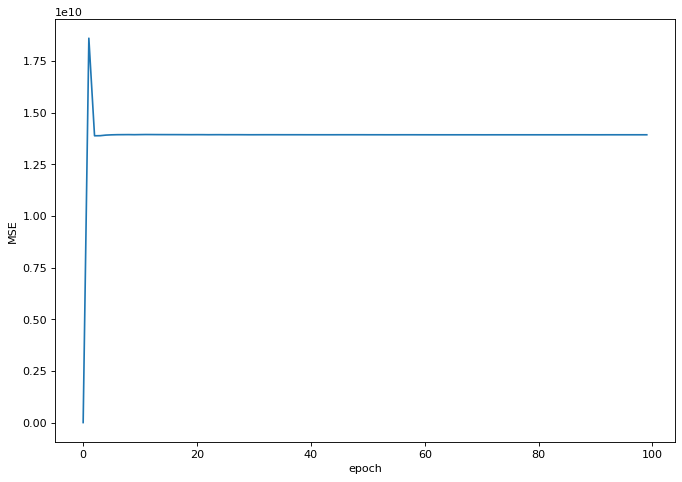

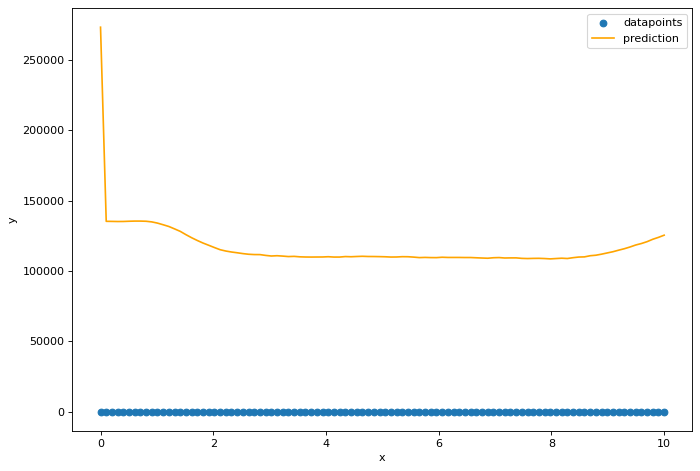

In [9]:
test_quant_dotprod(D, 3, EPOCH, x, xencoded, y, lr=0.0001)

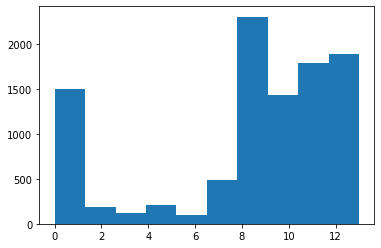

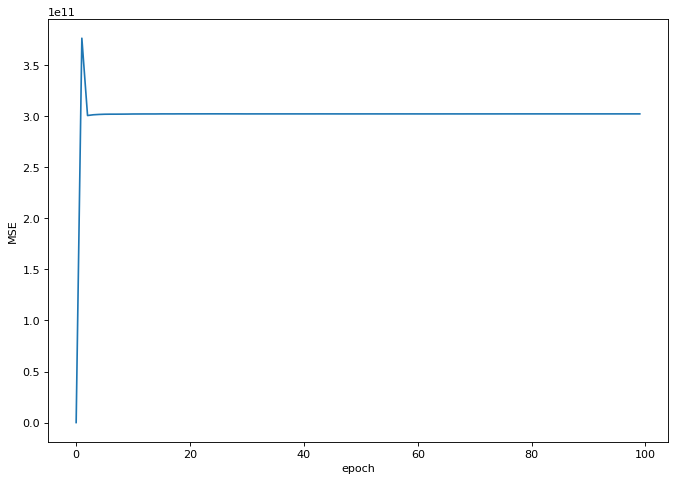

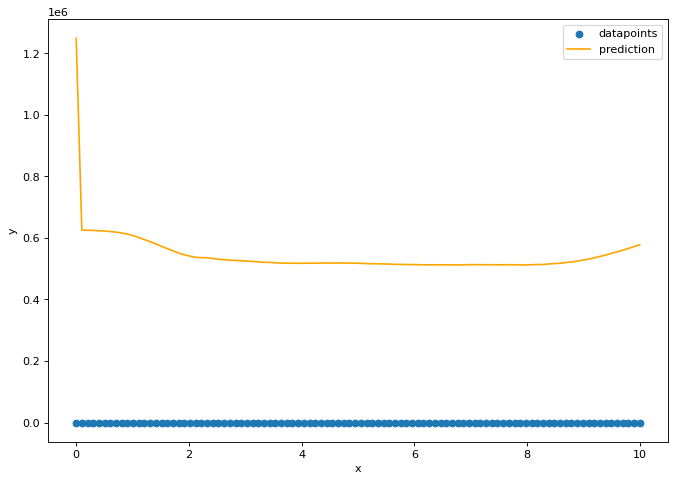

In [10]:
test_quant_dotprod(D, 4, EPOCH, x, xencoded, y, lr=0.0001)

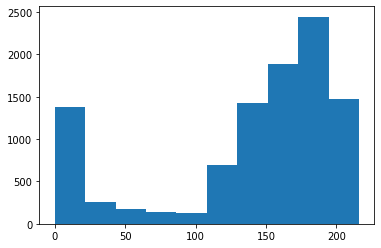

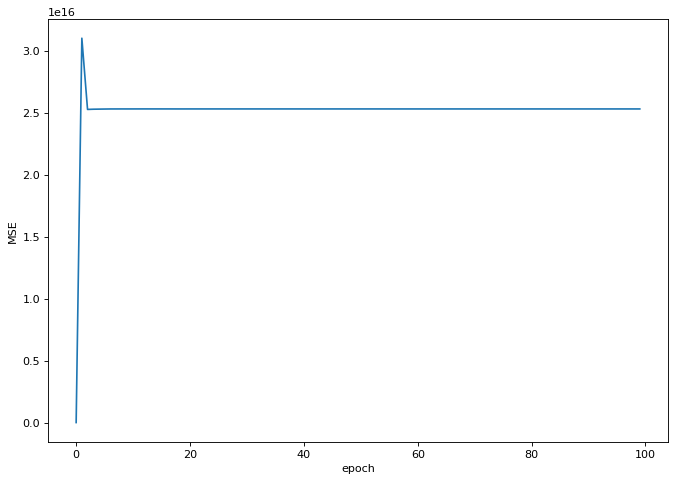

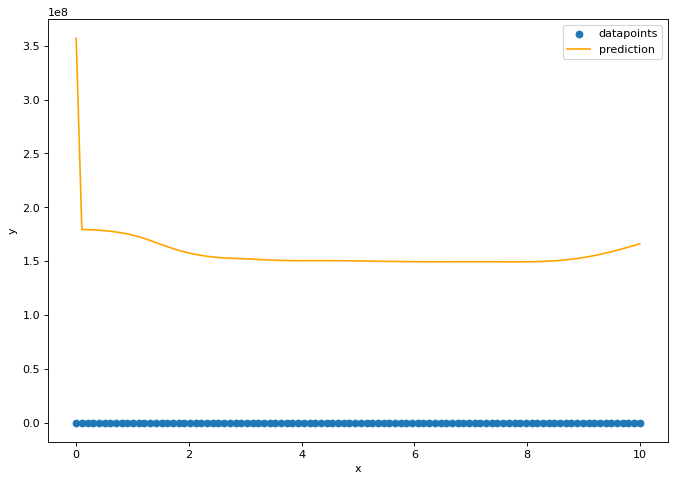

In [11]:
test_quant_dotprod(D, 8, EPOCH, x, xencoded, y, lr=0.0001)

## QuantHD with dot product (normalized [-1, 1])

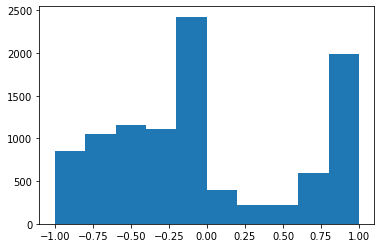

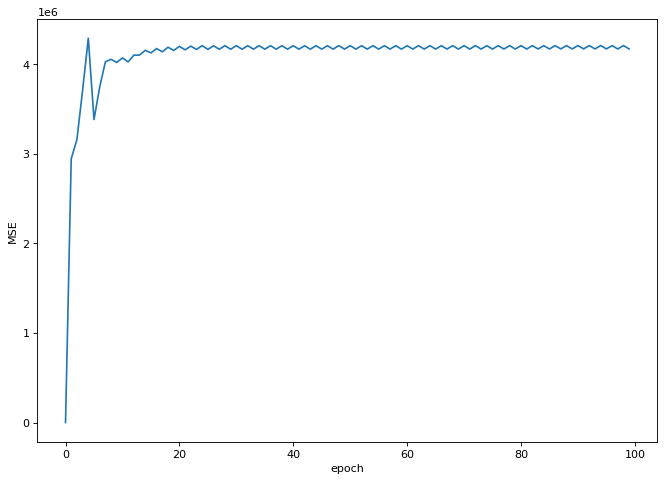

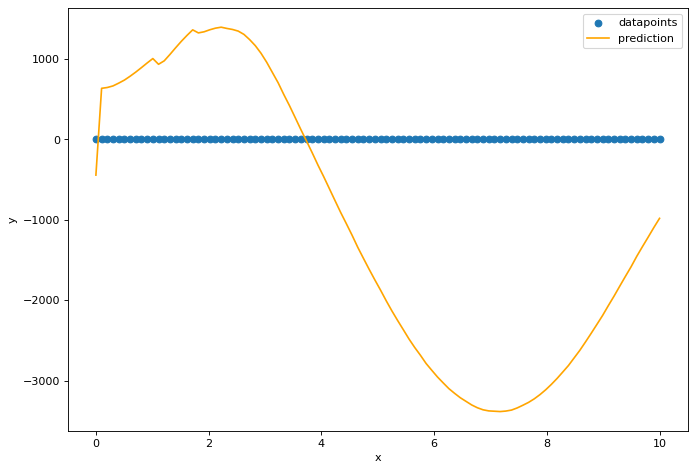

In [12]:
test_quant_dotprod(D, 4, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True)

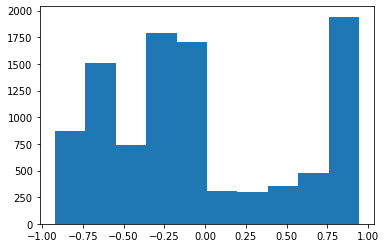

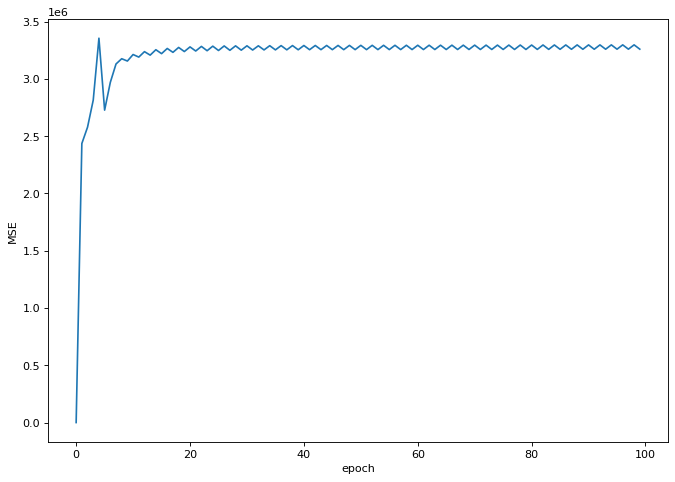

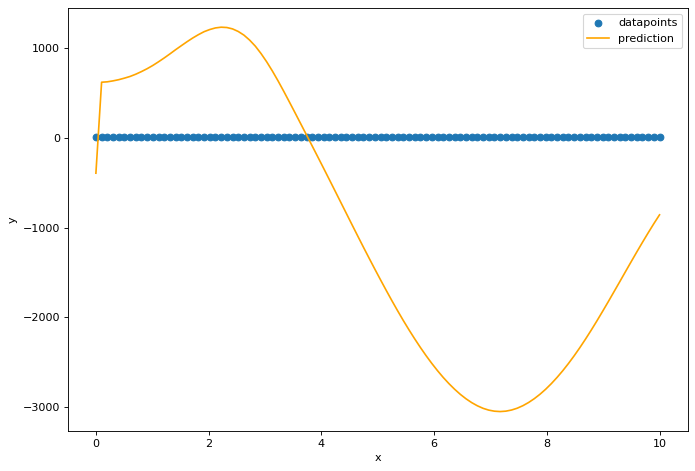

In [13]:
test_quant_dotprod(D, 8, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True)

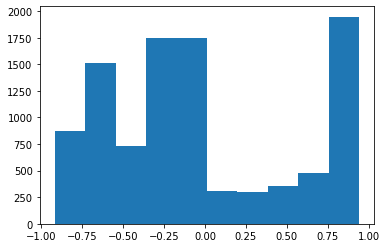

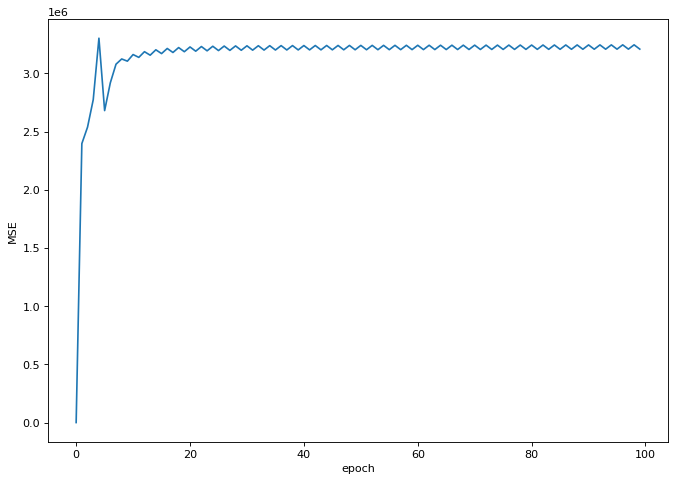

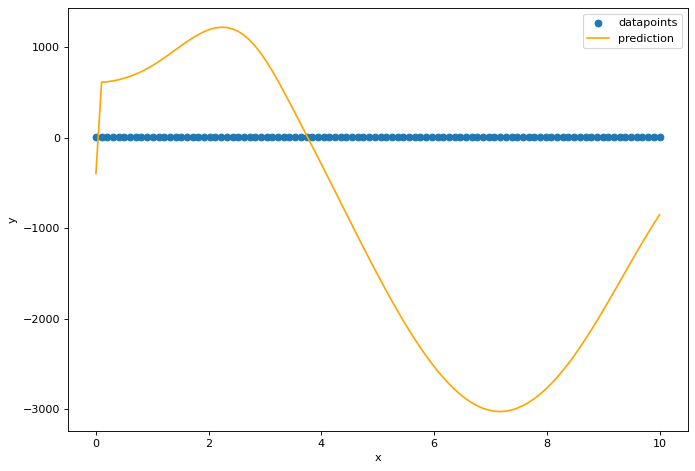

In [14]:
test_quant_dotprod(D, 16, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True)

## QuantHD with dot product (normalized [-1, 1] + fixed standard deviation)

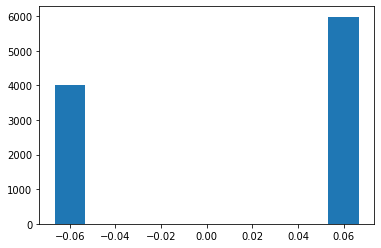

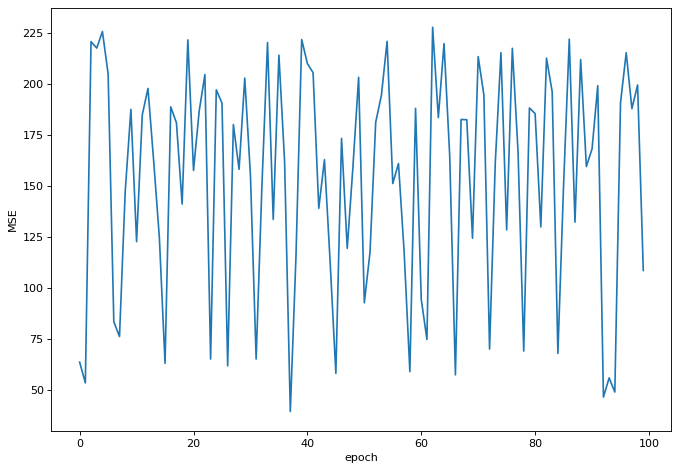

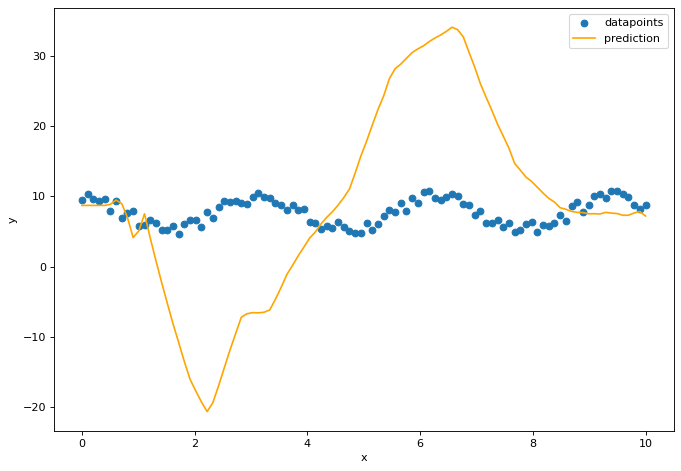

In [15]:
test_quant_dotprod(D, 4, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True, fix_quant_std=32)

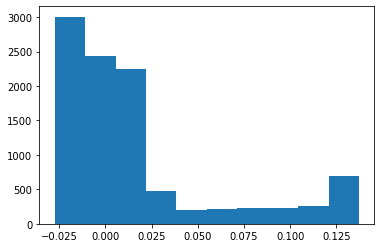

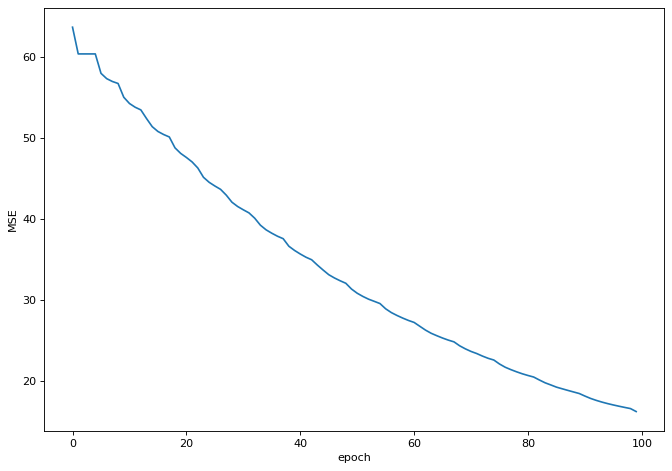

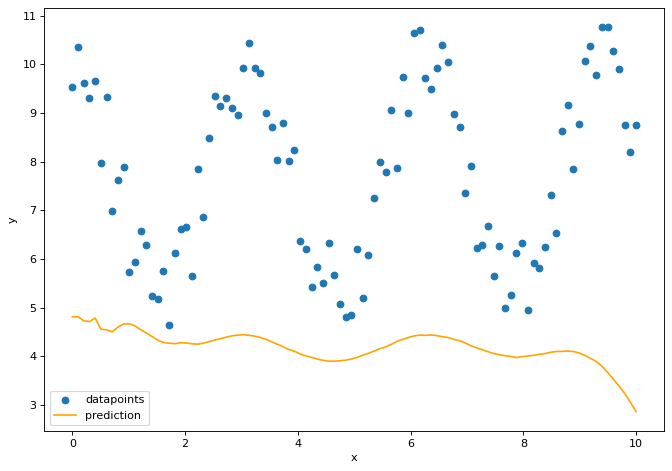

In [16]:
test_quant_dotprod(D, 8, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True, fix_quant_std=32)

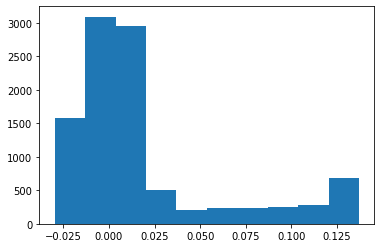

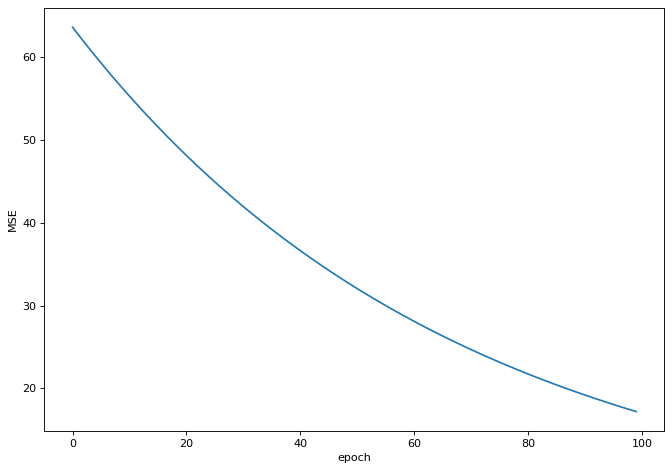

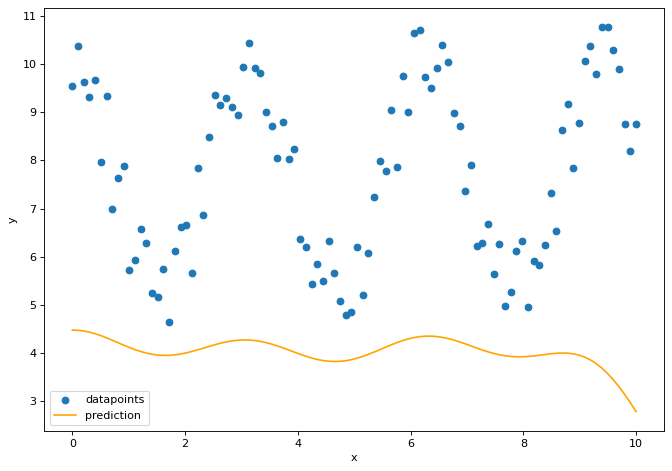

In [17]:
test_quant_dotprod(D, 16, EPOCH, x, xencoded, y, lr=0.0001, quant_norm=True, fix_quant_std=32)

## QuantHD with current matrix

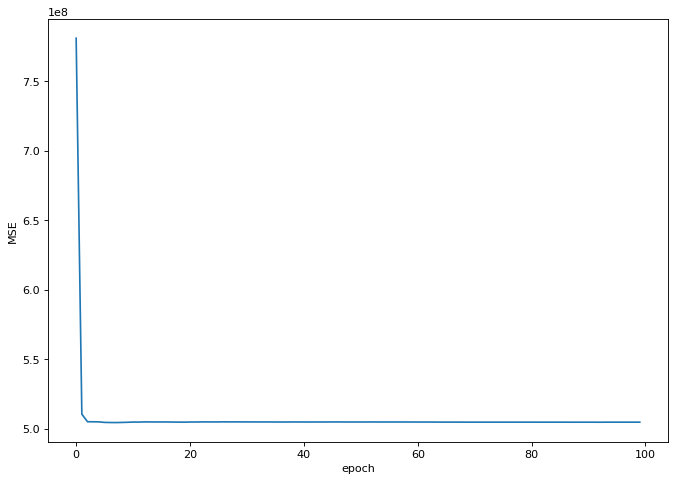

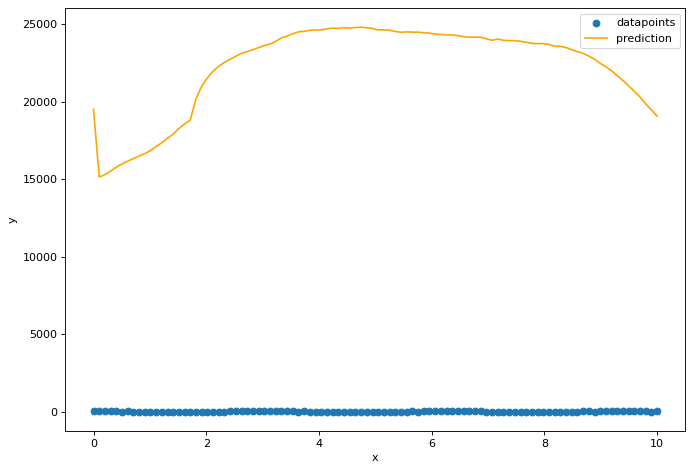

In [18]:
test_quant_current(D, 3, STD, curr_matrices['3'], EPOCH, x, xencoded, y, lr=0.0001)

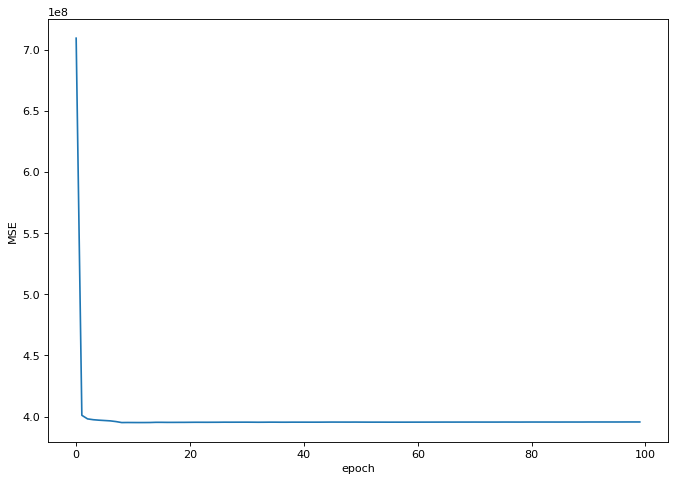

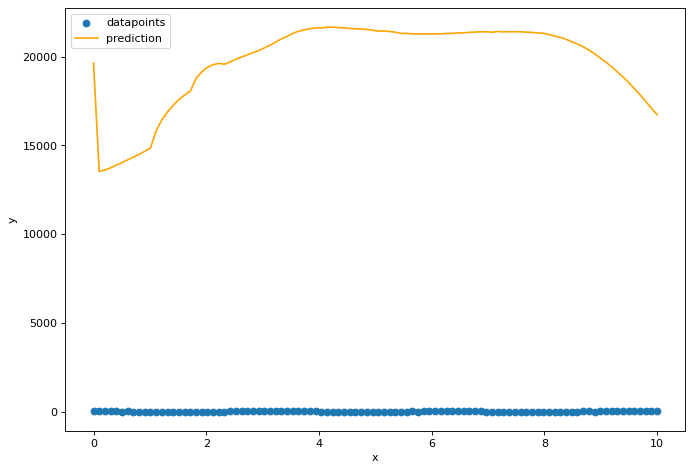

In [19]:
test_quant_current(D, 4, STD, curr_matrices['4'], EPOCH, x, xencoded, y, lr=0.0001)